# Checking bipartiteness

<b>Goal:</b> Implement an algorithm that for a given graph finds either a bipartition of its vertices or an odd cycle in it.

Below we provide a framework for your solution and example instances to test your implementation.

## Implementation

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

%matplotlib inline

In [44]:
def check_bipartiteness(G):
    """Finds a bipartition of G or an odd cycle in G.
    
    Args:
        G: Networkx graph.
    
    Returns:
        If G is bipartite, returns a list of two sets containing vertices in
        each part of a bipartition. If G is not bipartite, returns a list
        containing vertices in an odd cycle.
    """
    # Write your implementation here

    X = set()
    Y = set()
    usedNodes = []

    nodesToProcess = G.nodes

    startingNode = -1

    for node in nodesToProcess:
        if node in usedNodes:
            continue
        if (startingNode == -1):
            startingNode = node
        X.add(node)
        usedNodes.append(node)
        for adjNode in G.neighbors(node):
            if adjNode in usedNodes:
                if adjNode in X:
                    # find cycle
                    sp1 = nx.shortest_path(G, adjNode, startingNode)
                else:
                    continue
            Y.add(adjNode)
            usedNodes.append(adjNode)

    return [X, Y]


---

## Testing

You can use the function `check_bipartiteness_and_draw()` provided below to check your implementations on example graphs. Note that this function calls the function that you implemented above, returns the result and also plots the graph - either with node positions fixed in a way that the bipartiteness can be checked visually, or with the returned odd cycle highlighted.

You can check your implementation on the provided graphs or of course create your own.

In [45]:
# Function that calls `check_bipartitenes` and plots the graph with the result
def check_bipartiteness_and_draw(G):
    result = check_bipartiteness(G)
    
    if type(result[0]) == set:
        # Graph is bipartite
        # Position vertices in two columns
        pos = {}
        for p in (0, 1):
            y = 0
            for v in result[p]:
                pos[v] = (p, y)
                y += 1
                
        # Draw graph
        nx.draw_networkx(G, pos)
        plt.show()
    else:
        if len(result) % 2 == 0:
            print("An even cycle was returned; double-check your implementation.")
        else:
            # Graph is not bipartite
            # Create list of edges in the odd cycle
            cycle_edges = [(result[i - 1], result[i]) for i in range(len(result))]

            # Draw graph, highlight edges in the odd cycle
            pos = nx.spring_layout(G)
            nx.draw_networkx(G, pos)
            nx.draw_networkx_edges(G, pos, edgelist=cycle_edges, edge_color='blue', width=2)
            plt.show()
        
    return result

In [46]:
# Example graphs
graphs = [
    nx.trivial_graph(),
    nx.path_graph(10),
    nx.cycle_graph(6),
    nx.disjoint_union(nx.path_graph(2), nx.cycle_graph(8)),
    nx.cycle_graph(5),
    nx.complete_graph(4),
    nx.petersen_graph(),
    nx.disjoint_union(nx.path_graph(3), nx.cycle_graph(3)),
    nx.erdos_renyi_graph(50, 0.03, 0),
    nx.erdos_renyi_graph(50, 0.03, 18)
]

{0}
set()


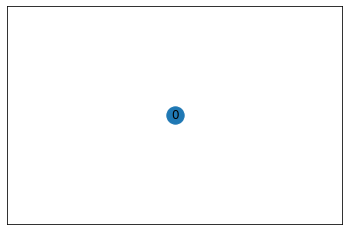

[{0}, set()]

In [47]:
check_bipartiteness_and_draw(graphs[0])
# expected output:
# [{0}, set()]

{0, 2, 4, 6, 8}
{1, 3, 5, 7, 9}


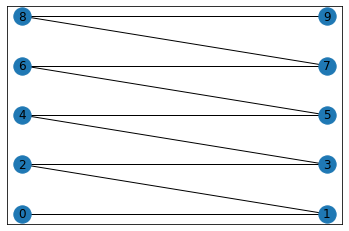

[{0, 2, 4, 6, 8}, {1, 3, 5, 7, 9}]

In [48]:
check_bipartiteness_and_draw(graphs[1])
# expected output:
# [{0, 2, 4, 6, 8}, {1, 3, 5, 7, 9}]

{0, 2, 4}
{1, 3, 5}


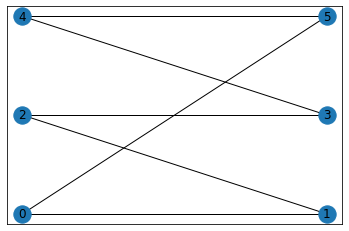

[{0, 2, 4}, {1, 3, 5}]

In [49]:
check_bipartiteness_and_draw(graphs[2])
# expected output:
# [{0, 2, 4}, {1, 3, 5}]

{0, 2, 4, 6, 8}
{1, 3, 5, 7, 9}


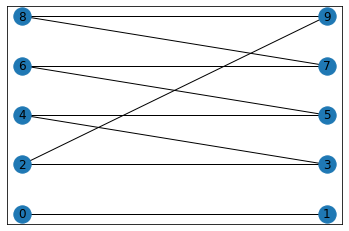

[{0, 2, 4, 6, 8}, {1, 3, 5, 7, 9}]

In [50]:
check_bipartiteness_and_draw(graphs[3])
# expected output:
# [{0, 2, 4, 6, 8}, {1, 3, 5, 7, 9}]

{0, 2}
{1, 3, 4}


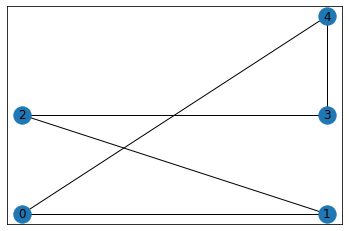

[{0, 2}, {1, 3, 4}]

In [51]:
check_bipartiteness_and_draw(graphs[4])
# expected output:
# [2, 1, 0, 4, 3]

{0}
{1, 2, 3}


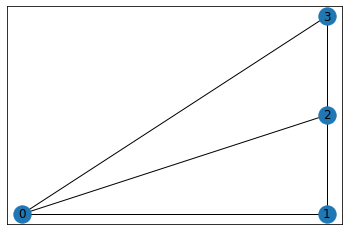

[{0}, {1, 2, 3}]

In [52]:
check_bipartiteness_and_draw(graphs[5])
# expected output:
# [1, 0, 2]

{0, 2, 6}
{1, 3, 4, 5, 7, 8, 9}


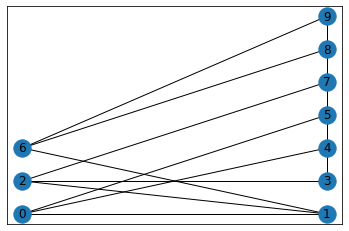

[{0, 2, 6}, {1, 3, 4, 5, 7, 8, 9}]

In [53]:
check_bipartiteness_and_draw(graphs[6])
# expected output:
# [2, 1, 0, 4, 3]

{0, 2, 3}
{1, 4, 5}


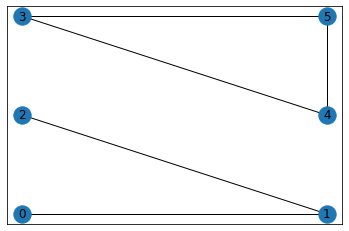

[{0, 2, 3}, {1, 4, 5}]

In [54]:
check_bipartiteness_and_draw(graphs[7])
# expected output:
# [4, 3, 5]

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 24, 25, 27, 32, 34, 43, 45, 48}
{19, 23, 26, 28, 29, 30, 31, 33, 35, 36, 37, 38, 39, 40, 41, 42, 44, 46, 47, 49}


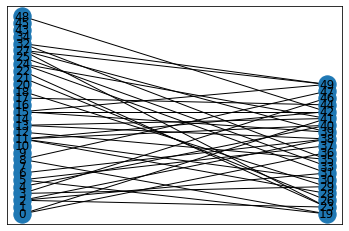

[{0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  20,
  21,
  22,
  24,
  25,
  27,
  32,
  34,
  43,
  45,
  48},
 {19,
  23,
  26,
  28,
  29,
  30,
  31,
  33,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  44,
  46,
  47,
  49}]

In [55]:
check_bipartiteness_and_draw(graphs[8])
# expected output:
# [2, 38, 13, 41, 39, 27, 23]

{0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 23, 24, 28, 29, 30, 31, 35, 36, 38, 41, 42, 43, 44}
{7, 18, 19, 21, 22, 25, 26, 27, 32, 33, 34, 37, 39, 40, 45, 46, 47, 48, 49}


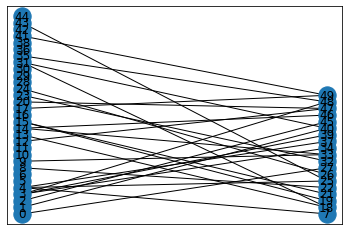

[{0,
  1,
  2,
  3,
  4,
  5,
  6,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  20,
  23,
  24,
  28,
  29,
  30,
  31,
  35,
  36,
  38,
  41,
  42,
  43,
  44},
 {7, 18, 19, 21, 22, 25, 26, 27, 32, 33, 34, 37, 39, 40, 45, 46, 47, 48, 49}]

In [56]:
check_bipartiteness_and_draw(graphs[9])
# expected output:
# bipartite, large output